# Ecuacion de onda
__Rosas Avila José Daniel__

$$
\frac{\partial^2 u}{\partial t^2}(x,t)-\alpha^2 \frac{\partial^2 u}{\partial x^2}(x,t)  = 0 \quad 0 < x < L, t> 0
$$

_Condiciones de frontera_

$$
u(0,t) = u(L,t) = 0 \quad para \quad t > 0
$$
_Condiciones iniciales_

$$
    u(x,0) = f(x)\quad y\quad \frac{\partial u}{\partial t}(x,0) = g(x), \quad para \quad 0 \leq x \leq L
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Espacial
a=0
b=1
L=b-a
Nx=20
hx=L/(Nx+1)
#Temporal
Tmax=1
ht=0.05
Nt=int(Tmax/ht)

#Dominios
x= np.linspace(a,b,Nx+2)
t= np.linspace(0,Tmax,Nt)
#Parametros
α = 2
λ = α *ht/hx

In [3]:
#Criterio de Courant
if λ <= 1:
    print('hx =', hx)
    print('ht =',ht)
    print('alfa = ',α)
    print('lambda = ',λ)
else:
    print('Metodo no estable, se cambia el paso en tiempo para mantener la estabilidad')
    print('hx =', hx)
    print('ht =',ht,'--->',hx/α)
    print('alfa = ',α)
    ht=hx/α
    print('lambda =',λ,'--->',α *ht/hx)
    λ = α *ht/hx
    Nt=int(Tmax/ht)
    


Metodo no estable, se cambia el paso en tiempo para mantener la estabilidad
hx = 0.047619047619047616
ht = 0.05 ---> 0.023809523809523808
alfa =  2
lambda = 2.1 ---> 1.0


In [4]:
#Funciones

#Condiciones
f = lambda x : np.sin(np.pi*x)
g = lambda x : 0

def condicionesIniciales (λ, ht , u, x, op =1):
    N = len (u)
    w = np. zeros_like (u)
    for i in range (1,N -1):
        if op == 1:
            w[i] = u[i] + ht * g(x[i])
        else :
            w[i] = (1 - λ **2) * u[i] + 0.5 * λ **2 * (u[i +1] + u[i -1]) + ht * g(x[i])
    return w
#Solucion exacta
u_exacta = lambda x,t : np.sin(np.pi* x) * np.cos(2*np.pi*t)




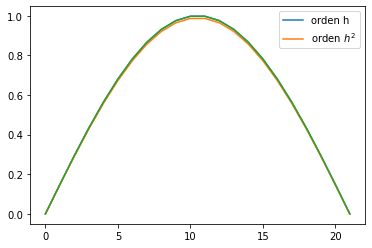

In [5]:
#Visualizacion de las condiciones de frontera
u= f(x) #funcion de onda en el dominio espacial en tiempo n-1
w = condicionesIniciales(λ,ht,u,x)  # funcion de onda variable en el tiempo n
w2= condicionesIniciales(λ,ht,u,x,2)
plt.plot(w,label='orden h')
plt.plot(w2,label='orden $h^2$')
plt.plot(u)
plt.legend();

__Solución numérica__

$$
u_{i,n+1} = 2(1-\lambda^2)u_{i,n}+\lambda^2(u_{i+1,n}+u_{i-1,n})-u_{i,n-1}
$$

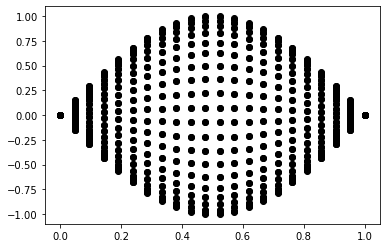

In [6]:
# Condiciones iniciales
u= f(x) #funcion de onda en el dominio espacial en tiempo n-1
w = condicionesIniciales(λ,ht,u,x,2)  # funcion de onda variable en el tiempo n

s= np.zeros(Nx+2) # Solucion en los nodos, en el tiempo n+1

for n in range(1,Nt):
    for i in range(1,Nx+1):
        s[i] = 2 * (1 - λ **2) * w[i] + λ**2 * (w[i +1] + w[i-1]) - u[i]
    u = w.copy() # u se convierte en la solucion anterior
    w = s.copy() #w se convierte en la nueva solicion en el tiempo n
    plt.plot(x,s,'ok')


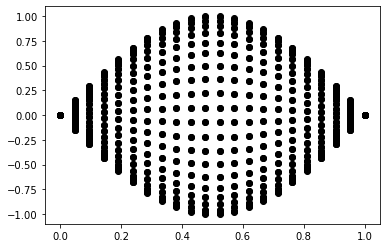

In [7]:
#DUDA VECTORIALIZADO? parece ser mismo resultado, pero difiere cuando no es estable
u= f(x) #funcion de onda en el dominio espacial en tiempo n-1
w = condicionesIniciales(λ,ht,u,x,2)  # funcion de onda variable en el tiempo n
s= np.zeros(Nx+2) # Solucion en los nodos, en el tiempo n+1
# print(u.size,w.size,s.size)

for n in range(1,Nt):

    s[1:-1]=2 * (1 - λ **2) *w[1:-1]+ λ**2 * (w[2:]+w[:-2])-u[1:-1]
    u = w.copy() # u se convierte en la solucion anterior
    w = s.copy() #
    plt.plot(x,s,'ok')

# Comparacion solucion analítica y numérica

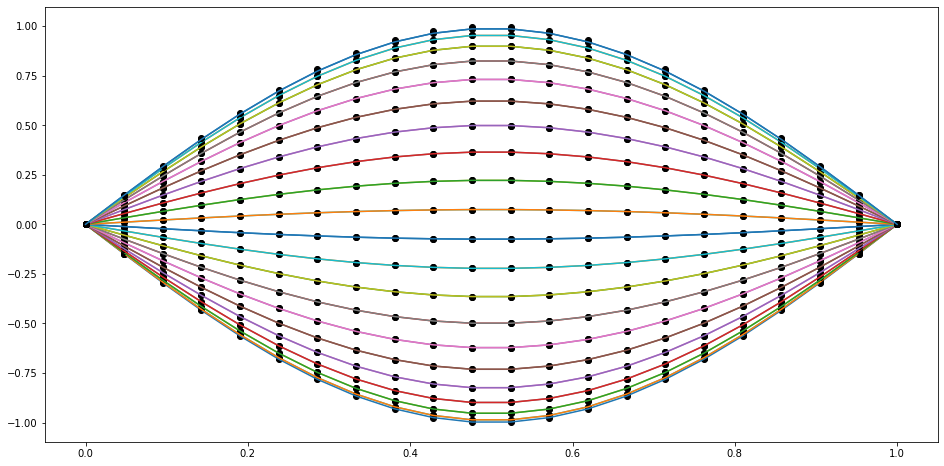

In [8]:
from matplotlib.animation import FuncAnimation
u= f(x) #funcion de onda en el dominio espacial en tiempo n-1
w = condicionesIniciales(λ,ht,u,x,2)  # funcion de onda variable en el tiempo n
s= np.zeros(Nx+2) # Solucion en los nodos, en el tiempo n+1

fig=plt.figure(figsize=(16,8))
errores=[]
for n in range(1,Nt):

    s[1:-1]=2 * (1 - λ **2) *w[1:-1]+ λ**2 * (w[2:]+w[:-2])-u[1:-1]
    u = w.copy() # u se convierte en la solucion anterior
    w = s.copy() #
    plt.plot(x,s,'ok')
    plt.plot(x,u_exacta(x,n*ht))
    errores.append(np.linalg.norm(np.abs(s-u_exacta(x,n*ht)),2))
    
    
 

   
    
    

In [9]:
import pandas as pd
pd.DataFrame(data={'tiempo': np.arange(ht,Nt*ht,ht),'Error $L_2$ en el tiempo t':errores})

,tiempo,Error $L_2$ en el tiempo t
0,0.023810,0.107768
1,0.047619,0.176937
2,0.071429,0.242153
3,0.095238,0.301960
4,0.119048,0.355022
5,0.142857,0.400153
6,0.166667,0.436345
7,0.190476,0.462790
8,0.214286,0.478897
9,0.238095,0.484306
